# Testbed for TF2 Optimizers

Inspired by machinelearningmastery.com [blog posting](https://machinelearningmastery.com/gradient-descent-optimization-with-nadam-from-scratch/)

Requires TF 2.x

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

## Setup

In [2]:
AXIS_LIMIT = 2
MAX_ITERATIONS = 1000
LEARNING_RATE = 0.1
INITIAL_POINT = [1.7, -1.5]
LOSS_FUNCTION_SCALING = [1, 1]
OPTIMIZERS = [
    tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Nadam(learning_rate=LEARNING_RATE),    
    tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Adagrad(learning_rate=LEARNING_RATE),
    tf.keras.optimizers.Adadelta(learning_rate=LEARNING_RATE),
]

In [3]:
def loss_function(x):
    return tf.reduce_sum((x * LOSS_FUNCTION_SCALING)**2, axis=-1)

## Display Loss Surface For Reference

In [4]:
# generate plot points
x = tf.range(-AXIS_LIMIT, AXIS_LIMIT, 0.1, dtype=tf.float32)
y = tf.range(-AXIS_LIMIT, AXIS_LIMIT, 0.1, dtype=tf.float32)

t_list = tf.meshgrid(x, y, indexing='ij')
t = tf.stack(t_list, axis=-1)

# generate loss surface
loss_surface = loss_function(t)

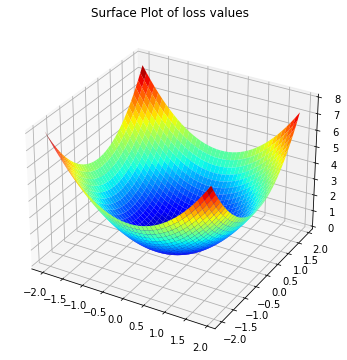

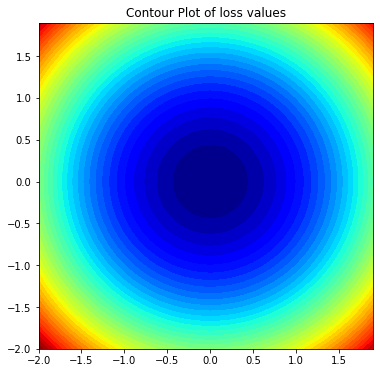

In [5]:

# display surface plot for loss_surface
figure = plt.figure(figsize=(6,6))
axis = figure.gca(projection='3d')
axis.plot_surface(t_list[0], t_list[1], 
                  loss_surface.numpy(), cmap='jet')
# show the plot
plt.title('Surface Plot of loss values')
plt.show()

# display contour plot version
figure = plt.figure(figsize=(6,6))
plt.contourf(t_list[0], t_list[1], loss_surface, levels=50, cmap='jet')
# show the plot
plt.title('Contour Plot of loss values')
plt.show()

## Test out different optimizers on the loss surface

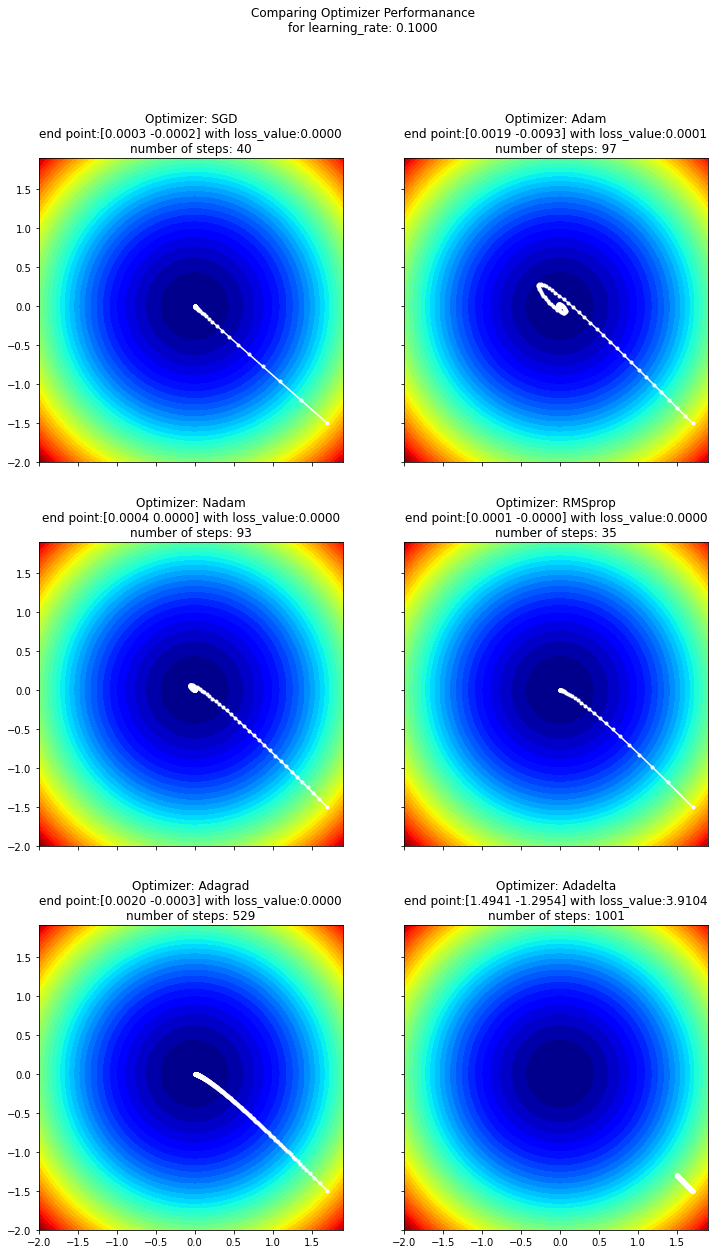

In [6]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(12, 20))
for idx, optimizer in enumerate(OPTIMIZERS):
    row = idx // 2
    col = idx % 2
    ax[row, col].set_aspect(1)
    plt_ax = ax[row, col]

    # setup for looping through optimizers
    x = tf.Variable(INITIAL_POINT, dtype=tf.float32)  # set initial point
    trajectory_points = [x.numpy()]   # record initial starting point
    for _ in range(MAX_ITERATIONS):

        #calculate loss function 
        with tf.GradientTape() as tape:
            loss = loss_function(x)

        # calculate gradient
        var_list = [x]
        grad = tape.gradient(loss, var_list)

        # update solution using the calculated gradient
        optimizer.apply_gradients(zip(grad, var_list))
        trajectory_points.append(x.numpy())
        
        # test if we are approaching a limit point
        if len(trajectory_points) > 10:
            if np.abs(loss_function(trajectory_points[-1]) 
                      - loss_function(trajectory_points[-2])) < 1e-7:
                break

    # consolidate the trajectory the optimizer
    trajectory = np.stack(trajectory_points)

    # generate subplot for this optimizer
    # add contour plot
    plt_ax.contourf(t_list[0], t_list[1], loss_surface, levels=50, cmap='jet')
    
    # overlay optimizer trajectory path
    plt_ax.plot(trajectory[:,0], trajectory[:,1], '.-', color='w')

    # add title for subplot
    plot_title = 'Optimizer: ' + optimizer._name 
    plot_title += '\nend point:' + np.array2string(trajectory[-1], 
                                           formatter={'float': lambda x: "%.4f" % x})
    plot_title += ' with loss_value:' + np.array2string(loss_function(trajectory[-1]).numpy(),
                                                   formatter={'float': lambda x: "%.4f" % x})
    plot_title += '\nnumber of steps: ' + '%d' % len(trajectory)
    plt_ax.set_title(plot_title)

# display all the subplots
plt.suptitle('Comparing Optimizer Performanance\nfor learning_rate: %.4f' % LEARNING_RATE)
plt.show()